In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import display
import scipy.stats as stats

# Import our custom function modules
import sampler_functions as sf
import outlier_functions as oef

# Set a nice plot style
sns.set_theme(style="whitegrid")
print("Libraries and modules imported successfully.")

Libraries and modules imported successfully.


In [2]:
# --- 1. Define Experiment Parameters ---

params = {
    'm': 3,
    'k': 1.0,
    'mu_true': 10.0,
    'prior_mean': 0.0,
    'prior_std': 20.0,
    'num_iterations_T': 1000, 
    'proposal_std_mu': 0.5,
    'proposal_std_z': 0.05
}

# Add z_domain to params, as it depends on k
z_domain_half_width = 1 / (2 * np.sqrt(params['k']))
params['z_domain'] = (-z_domain_half_width, z_domain_half_width)

print("Parameters for this run:")
print(params)

Parameters for this run:
{'m': 3, 'k': 1.0, 'mu_true': 10.0, 'prior_mean': 0.0, 'prior_std': 20.0, 'num_iterations_T': 1000, 'proposal_std_mu': 0.5, 'proposal_std_z': 0.05, 'z_domain': (-0.5, 0.5)}


Outlier threshold L (>99.5th percentile) = 73.6567
25th percentile (Q1): 9.0000, 75th percentile (Q3): 11.0000
Max value in clean dataset (x1): 10.1771
Min value in clean dataset (x1): 9.0439
Max value in outlier dataset (x2): 210.7316
Datasets generated successfully.
[ 9.81383794 10.17713457  9.04390674]
[ 10.17713457 210.73160721   9.81383794]


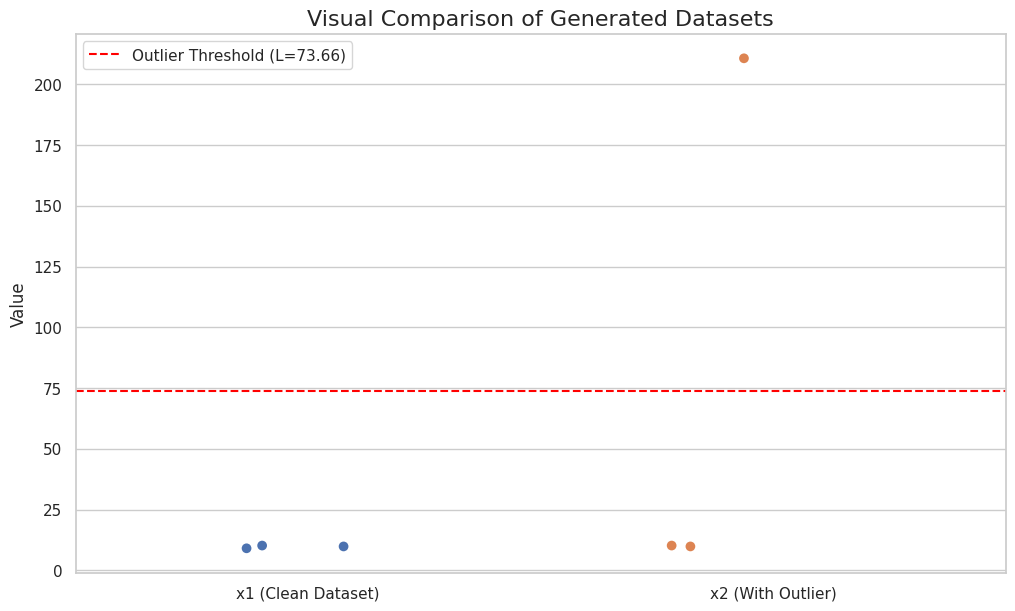

In [6]:
# --- 2. Generate Datasets (Clean vs. Outlier) ---

x1_clean, x2_with_outlier, outlier_threshold_L = sf.generate_datasets(params, outlier_percentile=0.995)

print("Datasets generated successfully.")
print(x1_clean)
print(x2_with_outlier)
# --- Visualize the generated datasets ---
plt.figure(figsize=(12, 7))
# A strip plot is great for seeing individual points and outliers
sns.stripplot(data=[x1_clean, x2_with_outlier], size=7, jitter=0.25, palette=['#4C72B0', '#DD8452'])

# Add the outlier threshold line for context
plt.axhline(outlier_threshold_L, color='red', linestyle='--', 
            label=f'Outlier Threshold (L={outlier_threshold_L:.2f})')

plt.xticks([0, 1], ['x1 (Clean Dataset)', 'x2 (With Outlier)'])
plt.ylabel("Value")
plt.title("Visual Comparison of Generated Datasets", fontsize=16)
plt.legend()
plt.show()

--- Calculating MLEs for both datasets ---
Calculating MLE for data with 3 points and k=1.0...
Calculating MLE for data with 3 points and k=1.0...
MLE of clean data, μ*(x1):     9.7240
MLE of outlier data, μ*(x2):  9.9982
Difference (μ*(x2) - μ*(x1)): +0.2742


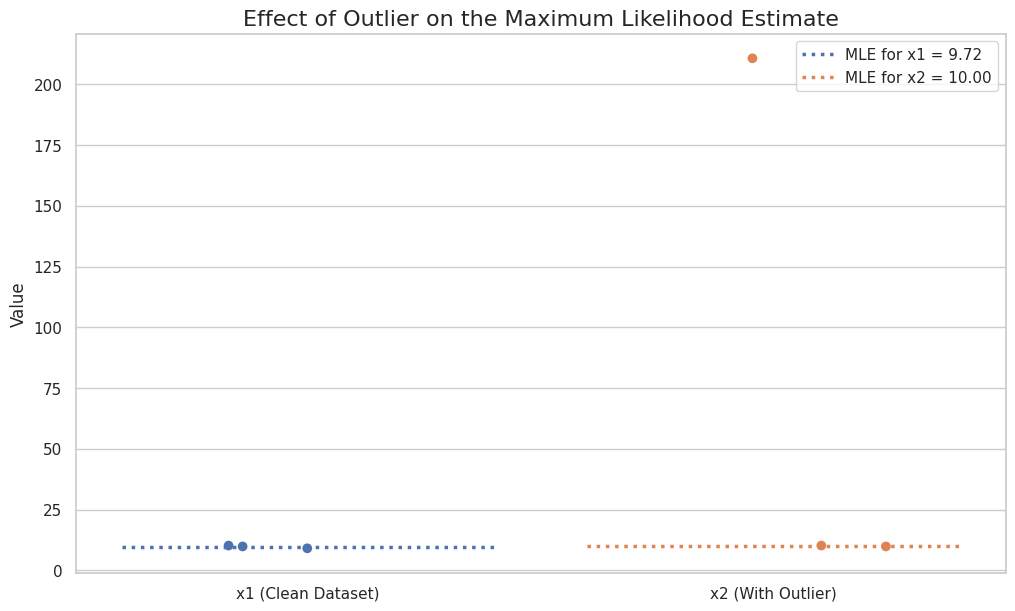

In [7]:
# --- 3. Calculate and Compare MLEs ---

print("--- Calculating MLEs for both datasets ---")
mu_star_1 = sf.get_mle(x1_clean, params)
mu_star_2 = sf.get_mle(x2_with_outlier, params)

print(f"MLE of clean data, μ*(x1):     {mu_star_1:.4f}")
print(f"MLE of outlier data, μ*(x2):  {mu_star_2:.4f}")
print(f"Difference (μ*(x2) - μ*(x1)): {mu_star_2 - mu_star_1:+.4f}")

# --- Visualize the MLEs on the data plots ---
plt.figure(figsize=(12, 7))
sns.stripplot(data=[x1_clean, x2_with_outlier], size=7, jitter=0.25, palette=['#4C72B0', '#DD8452'])

# Add the calculated MLEs as horizontal lines
plt.axhline(mu_star_1, color='#4C72B0', linestyle=':', lw=2.5, xmin=0.05, xmax=0.45, label=f'MLE for x1 = {mu_star_1:.2f}')
plt.axhline(mu_star_2, color='#DD8452', linestyle=':', lw=2.5, xmin=0.55, xmax=0.95, label=f'MLE for x2 = {mu_star_2:.2f}')

plt.xticks([0, 1], ['x1 (Clean Dataset)', 'x2 (With Outlier)'])
plt.ylabel("Value")
plt.title("Effect of Outlier on the Maximum Likelihood Estimate", fontsize=16)
plt.legend()
plt.show()